### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

#### Development

We start defining the target parameters of the model we want to predict, in this case the coefficients of a third order polynomial.

In [63]:
# we define the target parameters
a = 4
b = -3
c = -2
d = 3

# we define the polynomial function

def function(x):
    return a + b * x + c * x * x + d * x * x * x

Our NN must fit the model (a function $f: \mathbb{R} \rightarrow \mathbb{R})$ on noisy data $(x,y)$ given by a certain probabilistic process. We thus create a dataset $D=(X;Y)$, where $X$ is a set of independent variables and $Y$ a set of dependent variables, and we divide it into a training set $D_{train}$ and a validation set $D_{valid}$.

The set of the independent variables $X$ is drawn from a uniform distribution in the range we want to fit:

In [64]:
import numpy as np

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) # X training dataset
x_valid = np.random.uniform(-1, 1, 100) # X validation dataset
x_valid.sort()

The set of the dependent variables $Y$ is genereted by deviate the true values of $f(x)$, with $x \in X$, with a Gaussian noise (in general, given a prediction problem, the function $f: X \rightarrow Y$ is unknown).

In [65]:
sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(function(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(function(x_valid), sigma)

Comparison of the target function with the validation data:

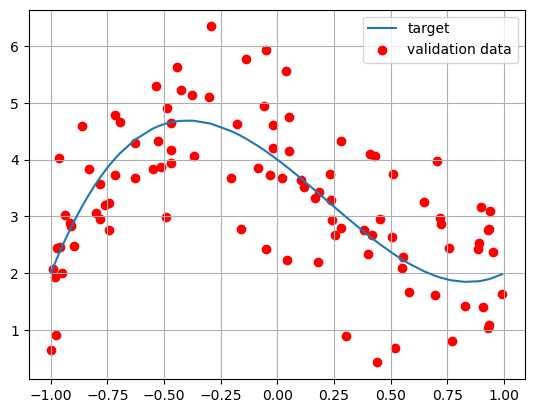

In [66]:
# plot validation and target dataset
y_target = function(x_valid) # ideal (target) linear function

import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

We now compose our NN.

We use <font color='red'>Keras</font> and we import its <font color='red'>Sequential model</font>. A model is a container of one or more layer and the Sequential model is a linear stack of layer where each layer has exactly one input tensor and one output tensor.
The <font color='red'>Dense</font> class allows to add in sequence densely connected layers to our NN, and the <font color='red'>Activation</font> class which applies an activation function to an output.

In [68]:
# we import the libraries
import tensorflow as tf
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# we import the Sequetial model from keras and the Dense class
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = tf.keras.Sequential()

The input layer has a single neuron fed with the independent variable set $X$.

In [69]:
# we add to the NN a densely-connected layer with 20 units with input shape 1:
model.add(Dense(20, input_shape=(1,), activation='relu', name='layer_1'))
# we add another layer with 10 units, each connected to 20 outputs of previous layer
model.add(Dense(50, activation='relu', name='layer_2'))
model.add(Dense(50, activation='relu', name='layer_3'))
model.add(Dense(50, activation='relu', name='layer_4'))
model.add(Dense(50, activation='relu', name='layer_5'))
model.add(Dense(50, activation='relu', name='layer_6'))
model.add(Dense(50, activation='relu', name='layer_7'))
model.add(Dense(1, activation='relu', name='output_layer'))

We compile the model with the <font color='red'>.compile()</font> method where we specify the <font color='red'>optimizer</font>, the <font color='red'>loss</font> and the <font color='red'>metrics</font>.

In [70]:
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

- <b>optimizer</b>: specifies the optimization algorithm used for searching the parameters that best fit our problem (e.g. sgd = stochastic gradient descent);
- <b>loss</b>: function to minimize during the optimization (e.g. mse = mean squared error);
- <b>metrics</b>: this object judges the performance of your model and is used to monitor the training.

In [71]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 20)                40        
                                                                 
 layer_2 (Dense)             (None, 50)                1050      
                                                                 
 layer_3 (Dense)             (None, 50)                2550      
                                                                 
 layer_4 (Dense)             (None, 50)                2550      
                                                                 
 layer_5 (Dense)             (None, 50)                2550      
                                                                 
 layer_6 (Dense)             (None, 50)                2550      
                                                                 
 layer_7 (Dense)             (None, 50)               

To fit the problem we feed our NN with the training dataset $D_{train}$, we set a number of epochs and a batch size, which specifies the the number of samples per gradient update in each epoch.

In [72]:
_batch_size = 10
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=_batch_size, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
100/100 [==============================] - 6s 17ms/step - loss: 2.1767 - mse: 2.1767 - val_loss: 1.3220 - val_mse: 1.3220
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 1.2941 - mse: 1.2941 - val_loss: 1.1284 - val_mse: 1.1284
Epoch 3/50
100/100 [==============================] - 1s 9ms/step - loss: 1.1606 - mse: 1.1606 - val_loss: 0.9421 - val_mse: 0.9421
Epoch 4/50
100/100 [==============================] - 1s 8ms/step - loss: 1.1542 - mse: 1.1542 - val_loss: 0.8988 - val_mse: 0.8988
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 1.1382 - mse: 1.1382 - val_loss: 0.9399 - val_mse: 0.9399
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 1.0781 - mse: 1.0781 - val_loss: 1.1306 - val_mse: 1.1306
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 1.0512 - mse: 1.0512 - val_loss: 0.8959 - val_mse: 0.8959
Epoch 8/50
100/100 [==============================] - 1s 7ms/step - loss: 1

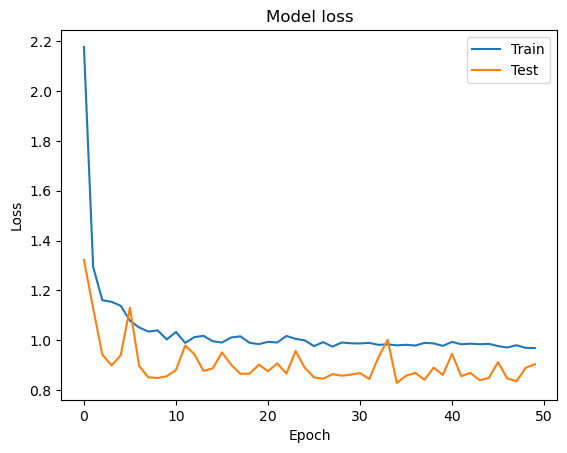

In [73]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 5ms/step


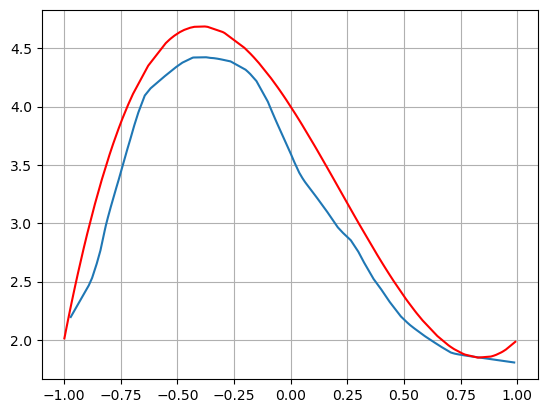

In [74]:
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)
plt.plot(x_predicted, y_predicted)
plt.plot(x_valid, y_target,color='r')
plt.grid(True)
plt.show()

If we consider points outside the $D_{train}$ range (e.g. $x \in [-2,-1] \cup [1,2])$ the model makes predictions which could slightly deviate from our target function...

4/4 [==============================] - 0s 6ms/step


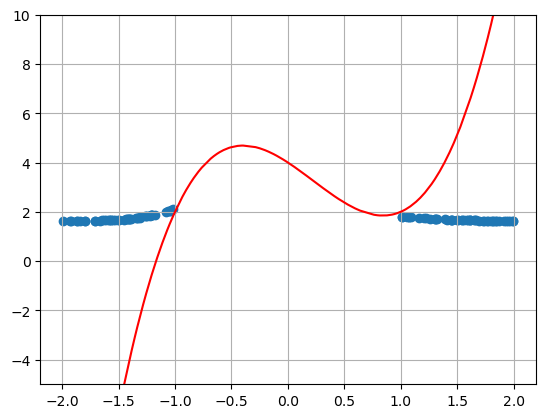

In [75]:
x_ofr_pos = np.random.uniform(1,2,50) # ofr = out of (training dataset) range
x_ofr_neg = np.random.uniform(-2,-1,50)

x = np.random.uniform(-2,2,200)
x.sort()
y_target = function(x)

x_ofr = np.concatenate((x_ofr_pos,x_ofr_neg))
# model prediction for out of range points
x_ofr.sort()
y_ofr = model.predict(x_ofr)
# target function for out of range points
plt.scatter(x_ofr, y_ofr)
plt.plot(x, y_target,color='r')
plt.ylim(-5,10)
plt.grid(True)
plt.show()

The reason is that the model can't recognize data from outside the $x$ range

### Exercise 11.2

Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

#### Development

In [76]:
import numpy as np

def fun(x,y):
    return np.sin(x*x+y*y)

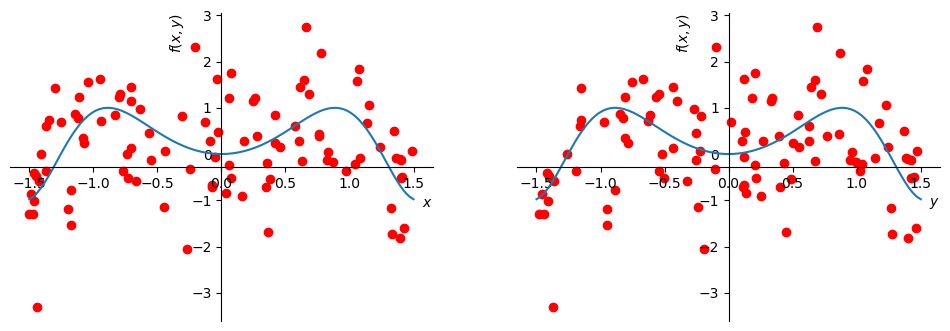

In [77]:
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 1000) # X training dataset
x_valid = np.random.uniform(-1.5, 1.5, 100) # X validation dataset
y_train = np.random.uniform(-1.5, 1.5, 1000) # Y training dataset
y_valid = np.random.uniform(-1.5, 1.5, 100) # Y validation dataset
x_valid.sort()
y_valid.sort()

sigma = 1.0 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(fun(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(fun(x_valid, y_valid), sigma)

X = np.linspace(-1.5,1.5,100)
Y = np.linspace(-1.5,1.5,100)
z_target = fun(X,Y)

#%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(X,z_target)
ax2.plot(Y,z_target)
ax1.scatter(x_valid,z_valid,color='r')
ax2.scatter(y_valid,z_valid,color='r')

ax1.spines[['left', 'bottom']].set_position('center')
ax1.spines[['top', 'right']].set_visible(False)

ax1.set_xlabel(r'$x$',loc='right')
ax1.set_ylabel(r'$f(x,y)$', loc='top')

ax1.spines[['left', 'bottom']].set_position('center')
ax1.spines[['top', 'right']].set_visible(False)

ax2.spines[['left', 'bottom']].set_position('center')
ax2.spines[['top', 'right']].set_visible(False)

ax2.set_xlabel(r'$y$',loc='right')
ax2.set_ylabel(r'$f(x,y)$', loc='top')

ax2.spines[['left', 'bottom']].set_position('center')
ax2.spines[['top', 'right']].set_visible(False)

plt.show()

In [79]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_shape=(2,), activation='relu', name='layer_1'))
    model.add(Dense(50, activation='relu', name='layer_2'))
    model.add(Dense(50, activation='relu', name='layer_3'))
    model.add(Dense(50, activation='relu', name='layer_4'))
    model.add(Dense(50, activation='relu', name='layer_5'))
    model.add(Dense(50, activation='relu', name='layer_6'))
    model.add(Dense(50, activation='relu', name='layer_7'))
    model.add(Dense(1, activation='relu', name='output_layer'))

    return model

In [80]:
def compile_model():
    # create the model
    model=create_model()
    # compile the model
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    return model

In [82]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_2DF = compile_model()

history = model_2DF.fit(x_train, y_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_valid, y_valid, z_valid))

TypeError: Model.fit() got multiple values for argument 'batch_size'